**Building a Digit Recognizer from Scratch**

In [1]:
# Install required packages
!pip install tensorflow streamlit pillow matplotlib numpy

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

In [2]:
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from 'c:\\Users\\dubey\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\fashion_mnist\\__init__.py'>

In [3]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Convert labels to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


**Display Sample Images from Each Class**

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(class_names)}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


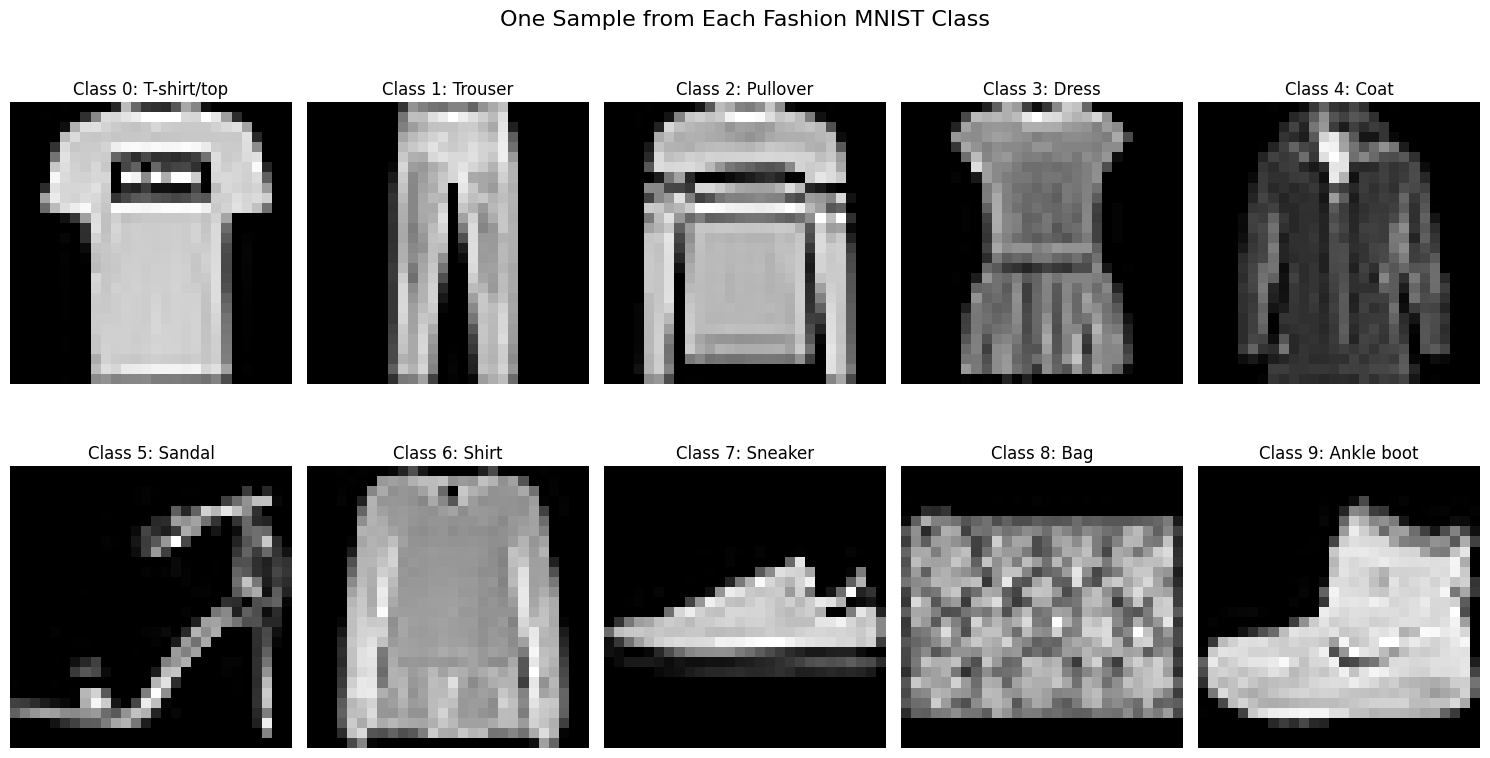

In [10]:
# Display one sample from each class
plt.figure(figsize=(15, 8))
for i in range(10):
    # Find the first occurrence of each class
    idx = np.where(y_train == i)[0][0]

    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Class {i}: {class_names[i]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('One Sample from Each Fashion MNIST Class', y=1.02, fontsize=16)
plt.show()

**Display Multiple Samples for Each Class**

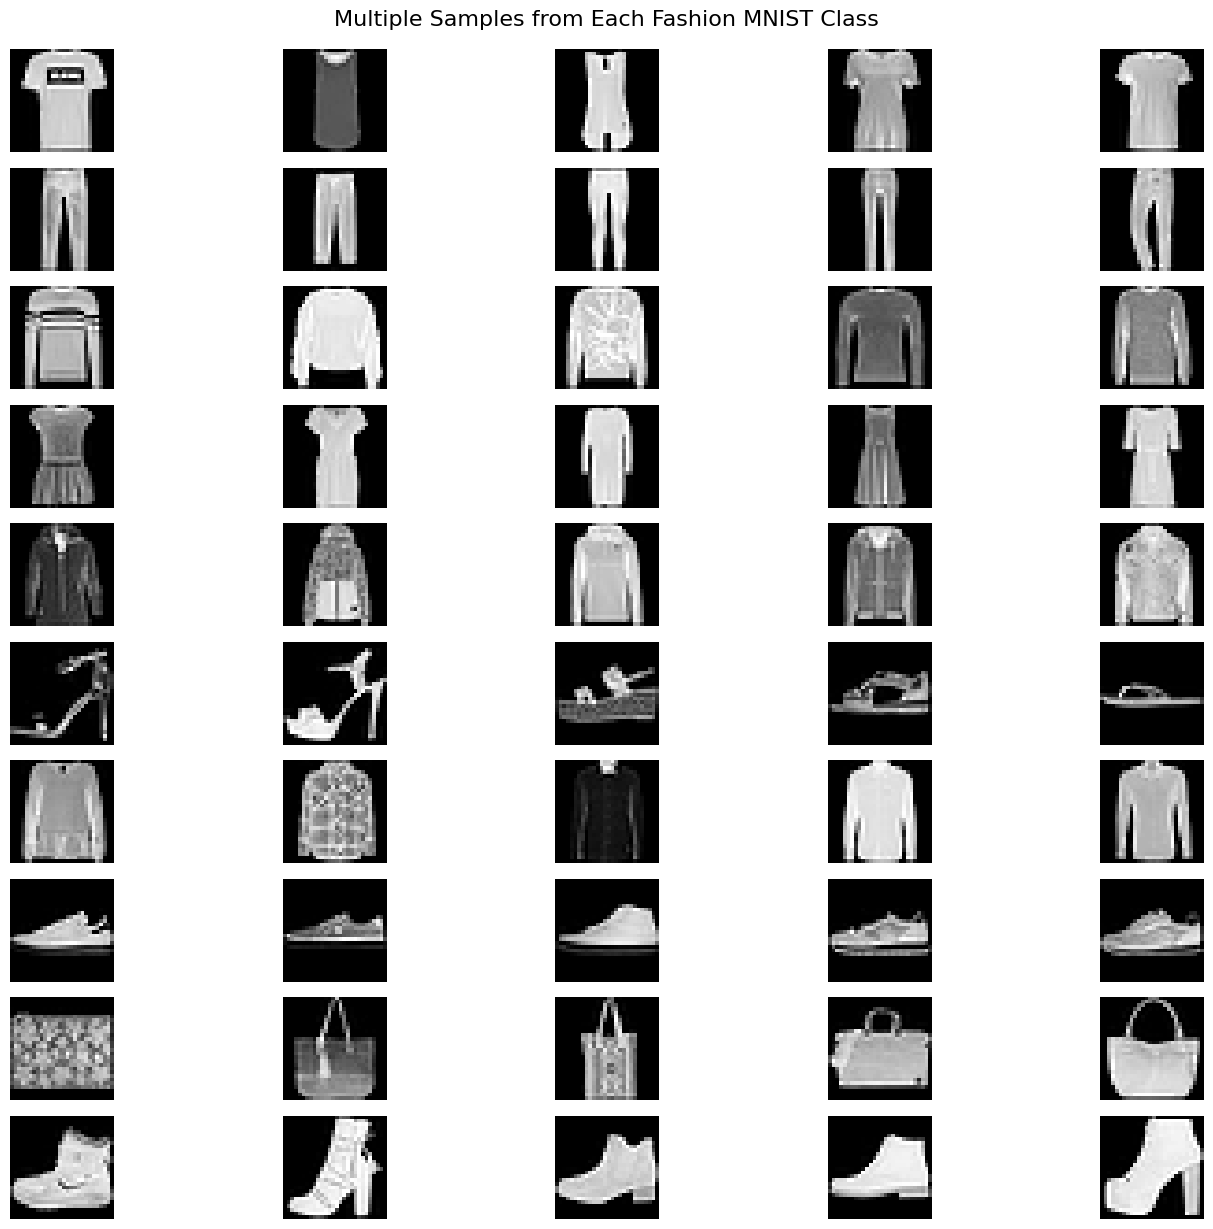

In [11]:
# Display multiple samples for each class
plt.figure(figsize=(15, 12))
for class_id in range(10):
    # Get 5 samples for each class
    class_indices = np.where(y_train == class_id)[0][:5]

    for j, idx in enumerate(class_indices):
        plt.subplot(10, 5, class_id * 5 + j + 1)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')

        # Only show class name for first image in each row
        if j == 0:
            plt.ylabel(class_names[class_id], rotation=0, ha='right', fontsize=12)

plt.tight_layout()
plt.suptitle('Multiple Samples from Each Fashion MNIST Class', y=1.02, fontsize=16)
plt.show()

**Display Random Samples in a Grid**

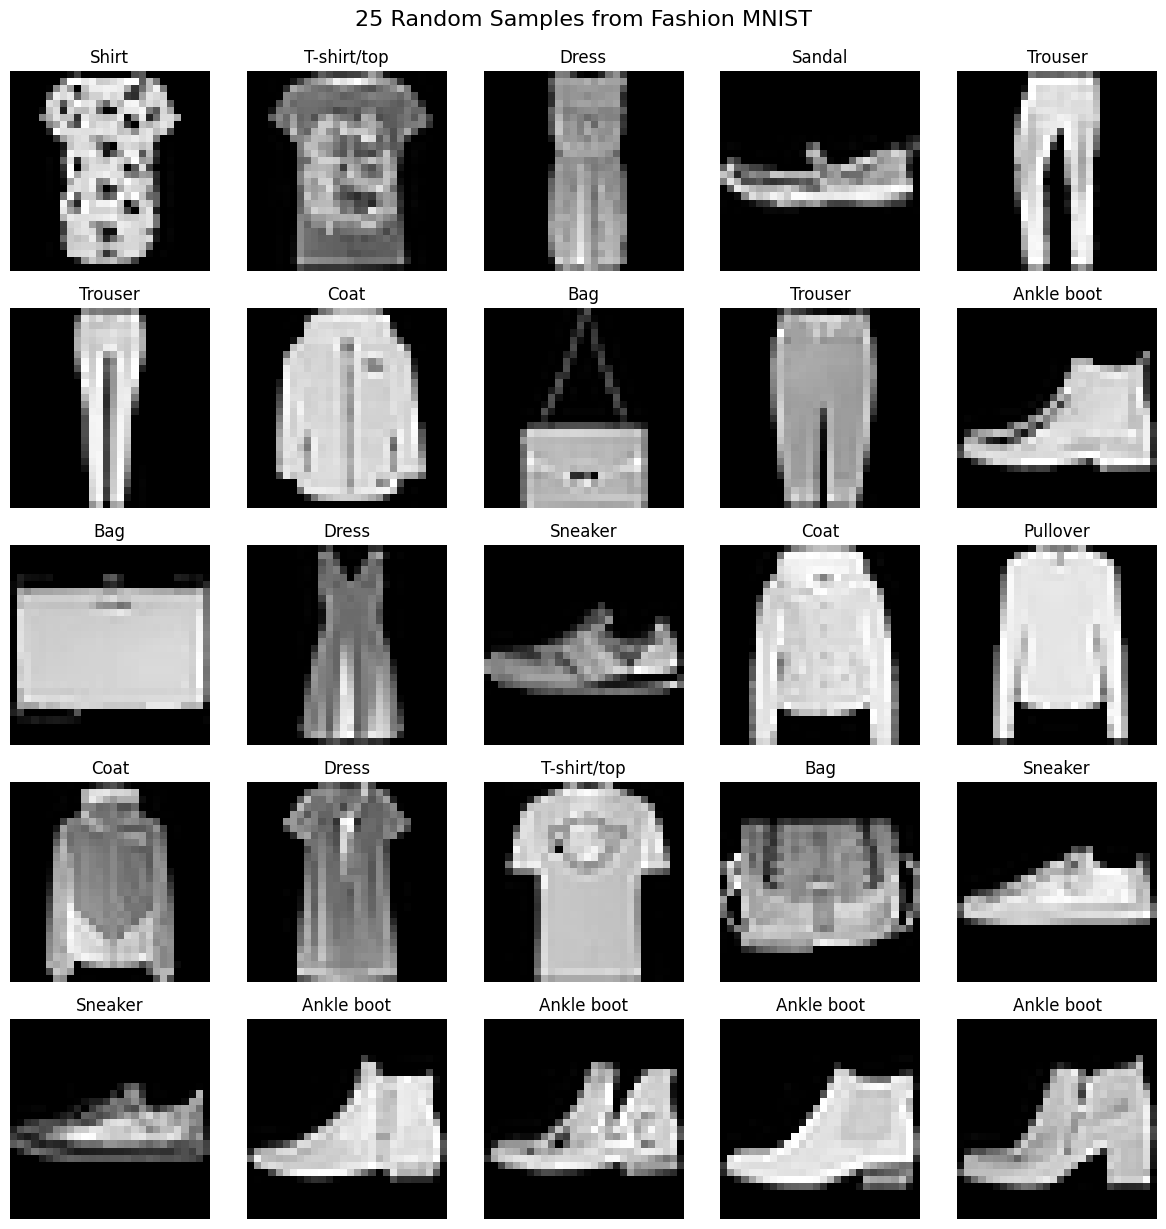

In [12]:
# Display random samples in a grid
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    random_idx = np.random.randint(0, len(x_train))
    plt.imshow(x_train[random_idx], cmap='gray')
    plt.title(f'{class_names[y_train[random_idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle('25 Random Samples from Fashion MNIST', y=1.02, fontsize=16)
plt.show()

**Display with Pixel Values (Heatmap)**

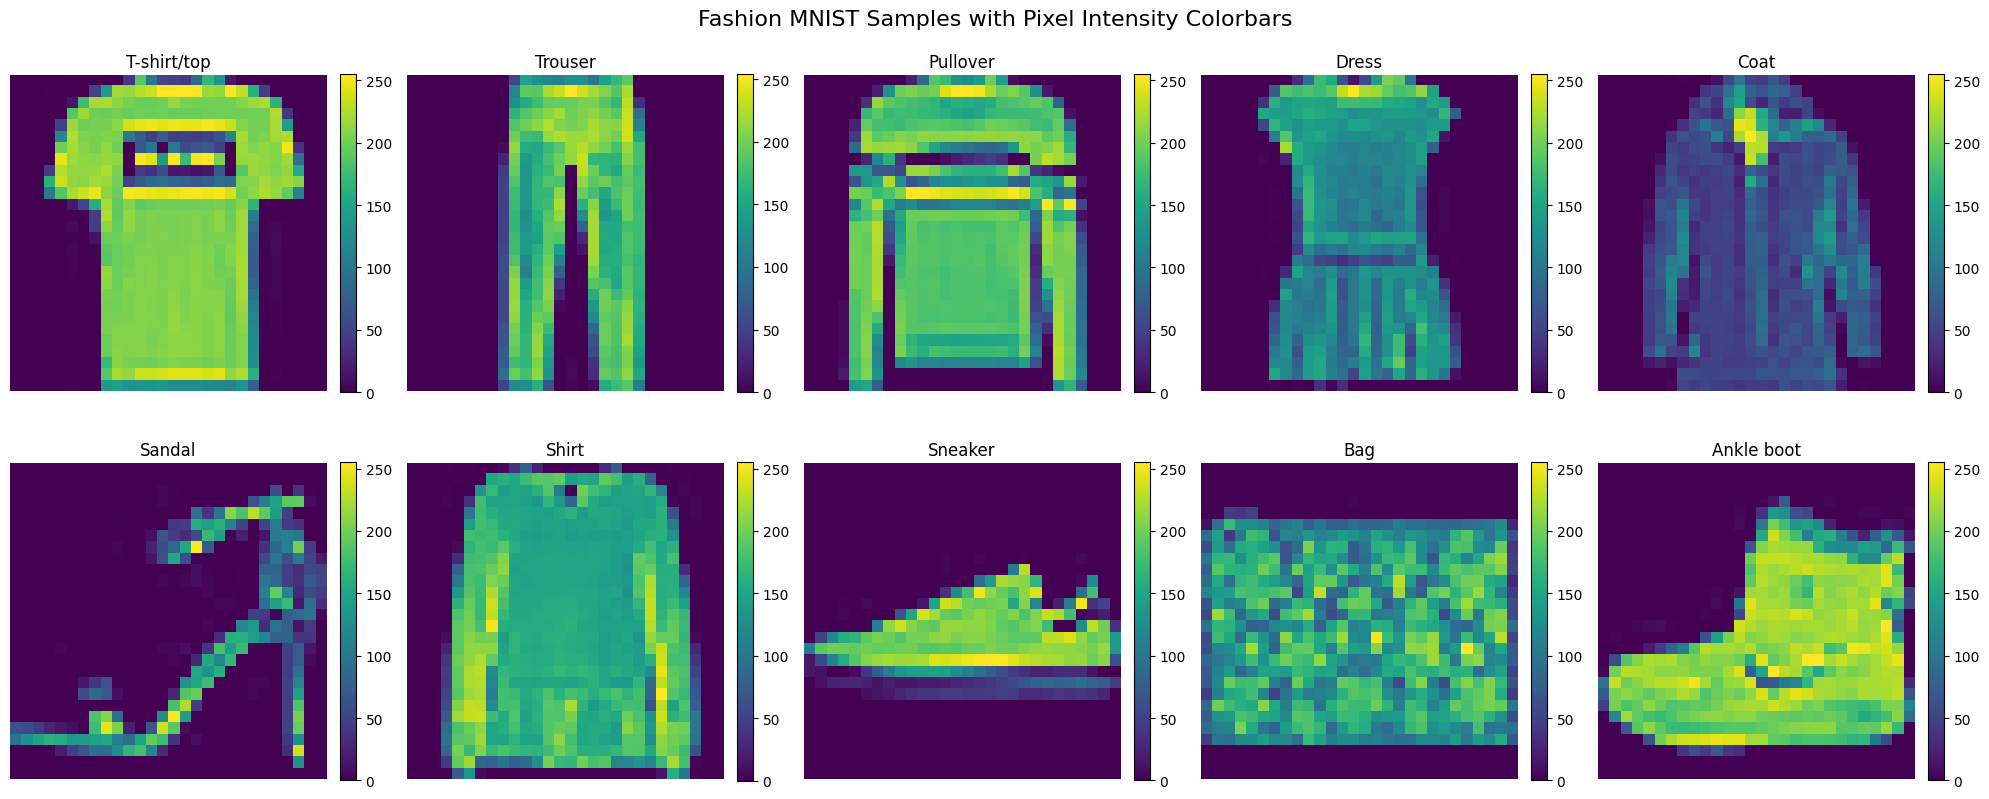

In [13]:
# Display sample with pixel values
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    row = i // 5
    col = i % 5

    idx = np.where(y_train == i)[0][0]

    # Show image
    im = axes[row, col].imshow(x_train[idx], cmap='viridis')
    axes[row, col].set_title(f'{class_names[i]}', fontsize=12)
    axes[row, col].axis('off')

    # Add colorbar for each subplot
    plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.suptitle('Fashion MNIST Samples with Pixel Intensity Colorbars', y=1.02, fontsize=16)
plt.show()

**Dataset Statistics and Distribution**

In [14]:
# Display dataset statistics
plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Training Set Class Distribution')

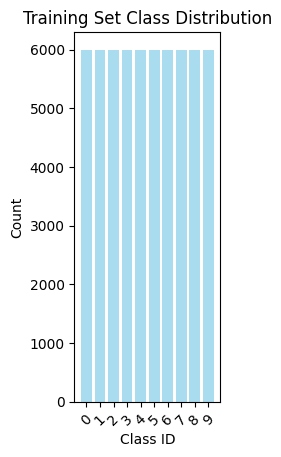

In [15]:
# Plot 1: Class distribution in training set
plt.subplot(1, 3, 1)
train_counts = [np.sum(y_train == i) for i in range(10)]
plt.bar(range(10), train_counts, color='skyblue', alpha=0.7)
plt.xticks(range(10), [str(i) for i in range(10)], rotation=45)
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Training Set Class Distribution')

Text(0.5, 1.0, 'Test Set Class Distribution')

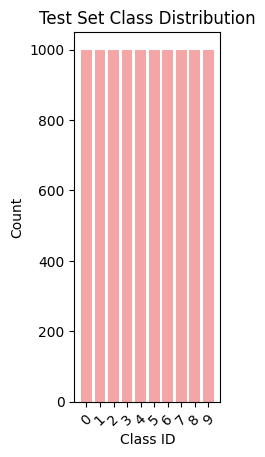

In [18]:
# Plot 2: Class distribution in test set
plt.subplot(1, 3, 2)
test_counts = [np.sum(y_test == i) for i in range(10)]
plt.bar(range(10), test_counts, color='lightcoral', alpha=0.7)
plt.xticks(range(10), [str(i) for i in range(10)], rotation=45)
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Test Set Class Distribution')

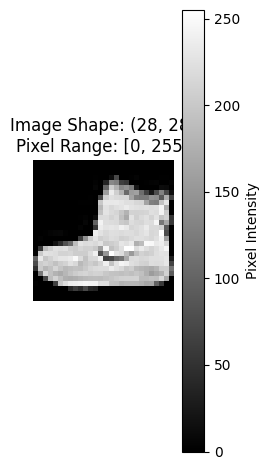

In [19]:
# Plot 3: Sample image dimensions and range
plt.subplot(1, 3, 3)
sample_image = x_train[0]
plt.imshow(sample_image, cmap='gray')
plt.colorbar(label='Pixel Intensity')
plt.title(f'Image Shape: {sample_image.shape}\nPixel Range: [{x_train.min()}, {x_train.max()}]')
plt.axis('off')

plt.tight_layout()
plt.show()

In [23]:
print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")


Training set size: 60000
Test set size: 10000
Image shape: (28, 28)
Pixel value range: [0, 255]


**Interactive Visualization**

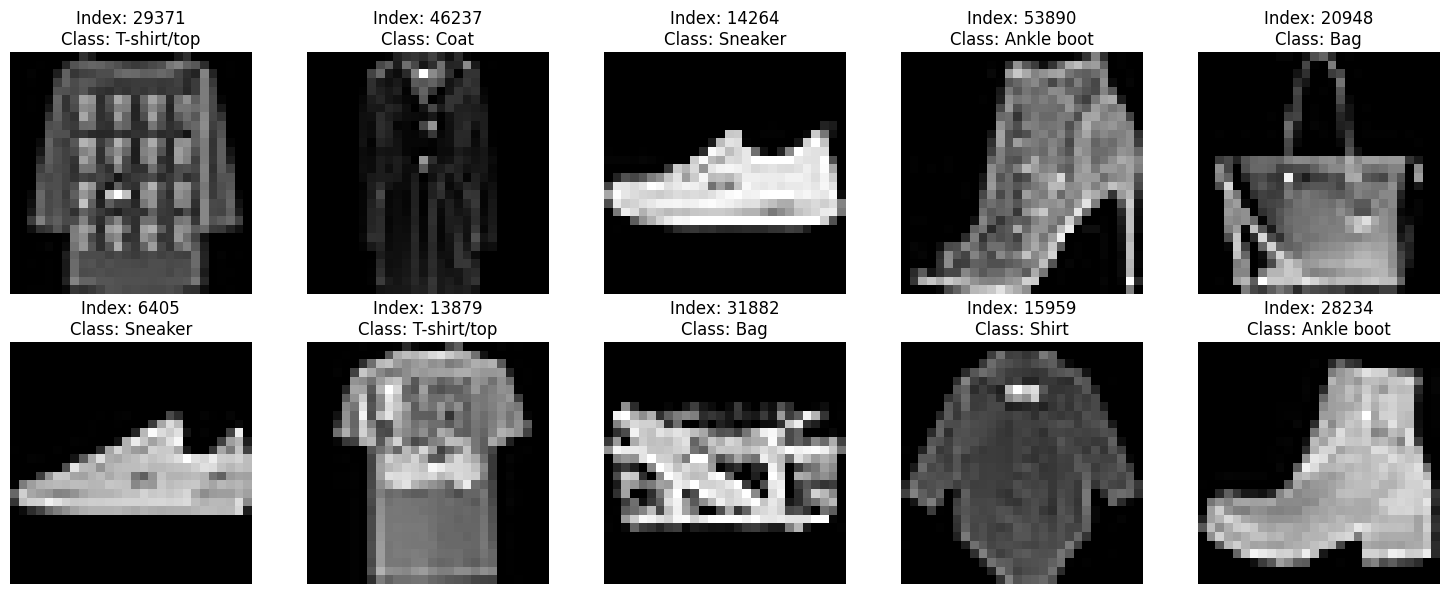

Showing 10 random samples
Total training samples: 60,000
Total test samples: 10,000


In [16]:
# Interactive exploration of samples
import random

def explore_dataset(num_samples=10):
    """Interactive function to explore random samples"""
    plt.figure(figsize=(15, 6))

    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        random_idx = random.randint(0, len(x_train) - 1)

        plt.imshow(x_train[random_idx], cmap='gray')
        plt.title(f'Index: {random_idx}\nClass: {class_names[y_train[random_idx]]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print some statistics
    print(f"Showing {num_samples} random samples")
    print(f"Total training samples: {len(x_train):,}")
    print(f"Total test samples: {len(x_test):,}")

# Run the exploration
explore_dataset(10)

**Build CNN model**

In [28]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Check the current shape of labels
print(f"Original y_train shape: {y_train.shape}")
print(f"Original y_test shape: {y_test.shape}")
print(f"Sample y_train values: {y_train[:10]}")

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"After one-hot encoding - y_train shape: {y_train.shape}")
print(f"After one-hot encoding - y_test shape: {y_test.shape}")
print(f"Sample y_train values:\n{y_train[:5]}")

Original y_train shape: (60000,)
Original y_test shape: (10000,)
Sample y_train values: [9 0 0 3 0 2 7 2 5 5]
After one-hot encoding - y_train shape: (60000, 10)
After one-hot encoding - y_test shape: (10000, 10)
Sample y_train values:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:
# Build the model (make sure it matches the one-hot encoded labels)
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for softmax
    ])
    return model

# Create and compile model
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

**train the model.**

In [30]:
# Now train the model
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5543 - loss: 1.2380 - val_accuracy: 0.8088 - val_loss: 0.5109
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7894 - loss: 0.5834 - val_accuracy: 0.8322 - val_loss: 0.4367
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8206 - loss: 0.4974 - val_accuracy: 0.8578 - val_loss: 0.3721
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8437 - loss: 0.4447 - val_accuracy: 0.8692 - val_loss: 0.3530
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8555 - loss: 0.4040 - val_accuracy: 0.8775 - val_loss: 0.3242
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8648 - loss: 0.3833 - val_accuracy: 0.8815 - val_loss: 0.3176
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8762 - loss: 0.3448 - val_accuracy: 0.8858 - val_loss: 0.3011
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8824 - loss: 0.3307 - val_accuracy: 0.

**Plot training history**


In [31]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

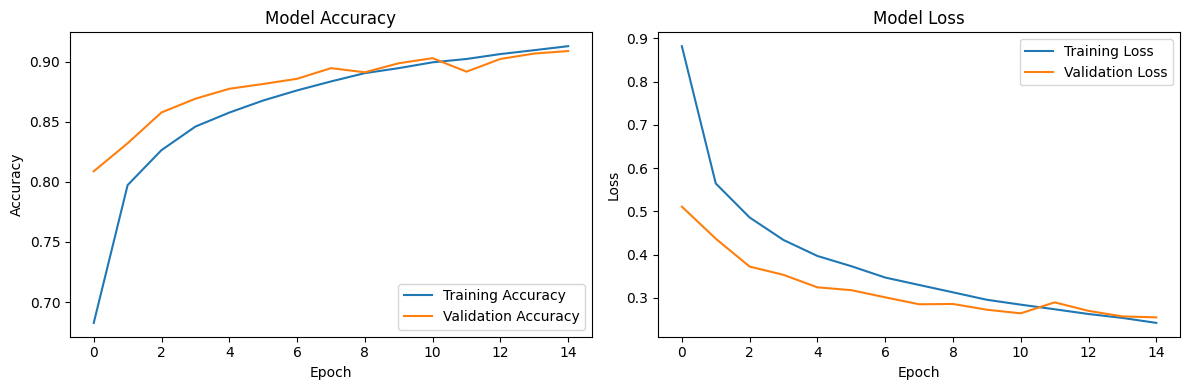

In [33]:
# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


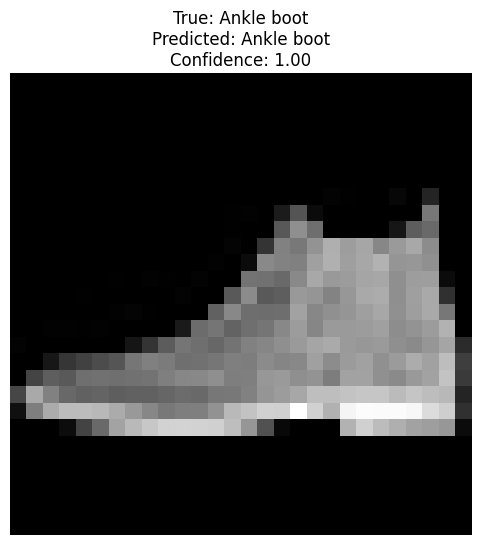

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


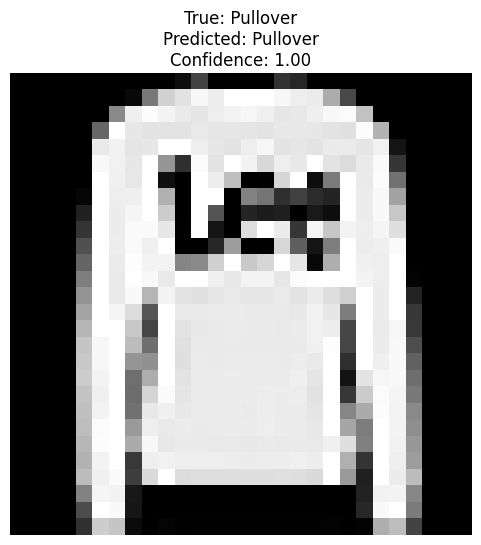

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


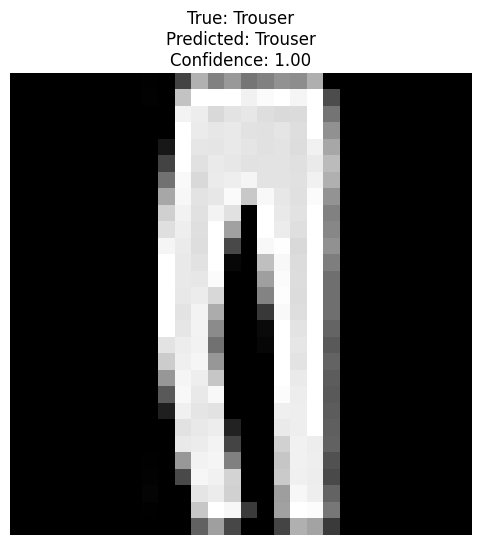

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


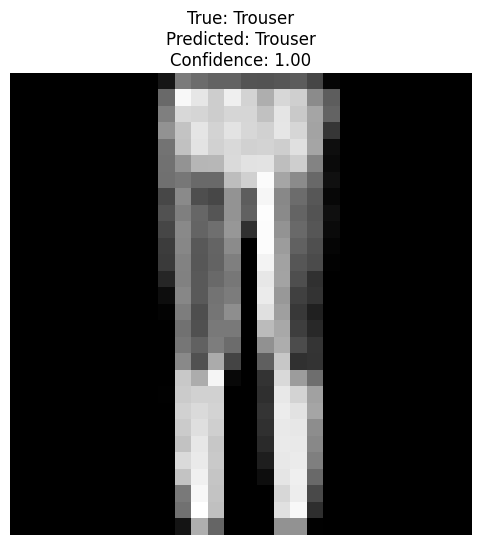

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


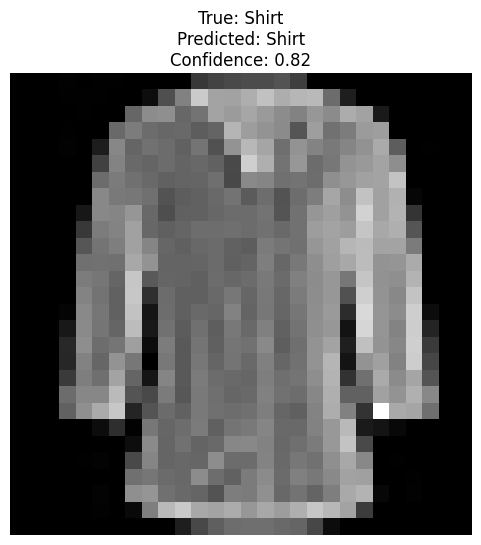

In [34]:
# Save the model
model.save('fashion_mnist_cnn.h5')

# Test prediction on sample images
def predict_sample(image_index):
    sample_image = x_test[image_index]
    sample_label = np.argmax(y_test[image_index])

    prediction = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])

    plt.figure(figsize=(6, 6))
    plt.imshow(sample_image.reshape(28, 28), cmap='gray')
    plt.title(f'True: {class_names[sample_label]}\nPredicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Test on a few samples
for i in range(5):
    predict_sample(i)